# Convolutional Neural Networks (CNNs)
---
 ## What are CNNs?
CNN is a special type of neural network which is based on the convolution operation. A generic CNN consists of a fewivation, Flatten, and Dense. It is mainly used for image-based tasks,  types of layers: Conv (convolutional) layer, MaxPooling, Dropout, Actthough they can be used in Audio Clasisfication and Natural Language Processing also. Over the years, a lot of research has been done to invent new architectures that are more optimised and suitable for various tasks, for example: ResNet, YoloV5, Xception, InceptionV3,etc.
   ![cnn](https://miro.medium.com/max/470/1*81Y95NKxLzXLEut7nepmZA.png)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,GlobalMaxPooling2D,GlobalMaxPooling1D
from keras.models import Sequential
import numpy as np

# Popular Libraries 
There are many libraries and frameworks which are available for implementing Deep Learning tasks, but here are some of the most-loved and popular libraries among the community for Deep Learning:
##1. Tensorflow
<img src="https://cdn-images-1.medium.com/max/1200/1*iDQvKoz7gGHc6YXqvqWWZQ.png" alt="drawing" width="170"/><br>
TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
##2. Pytorch 
<img src="https://miro.medium.com/max/1200/1*4br4WmxNo0jkcsY796jGDQ.jpeg" alt="drawing" width="300"/><br>
PyTorch is an open source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab.
##3. Keras 
<img src="https://keras.io/img/logo-k-keras-wb.png" alt="drawing" width="300"/><br>
Keras is a library (also developed mainly by Google) which uses Tensorflow functions as its base. It has been developed with the purpose of reducing the load on developers while creating deep learning models and it is highly intuitive, allowing for quicker results, faster experimentation and testing of new ideas.

In this tutorial we will be using Keras to implement and train our model.

In [ ]:
## Loading dataset from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


#Our aim for today 
* Learn the basic concepts of Convolutional Neural Networks
* How to implement them in Keras
* Train a CNN model that can differentiate between Cats and Dogs

In [ ]:
!nvidia-smi 

Wed Apr 13 15:26:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Dataset source:
We will be using a dataset provided on Kaggle for our model. It has been uploaded to Google drive, and then accessed via Colab notebooks.
https://www.kaggle.com/c/dogs-vs-cats 


![catsvsdogs](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)

In [ ]:
!mkdir CatsnDogs


/content


A few commands to extract and organize our data:

In [ ]:
!unzip ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip -d ./CatsnDogs


Archive:  ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip
  inflating: ./CatsnDogs/sampleSubmission.csv  
  inflating: ./CatsnDogs/test1.zip   
  inflating: ./CatsnDogs/train.zip   


In [ ]:
!unzip ./CatsnDogs/test1.zip 


Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
!unzip ./CatsnDogs/train.zip -d ./train

Streaming output truncated to the last 5000 lines.
  inflating: ./train/train/dog.5499.jpg  
  inflating: ./train/train/dog.55.jpg  
  inflating: ./train/train/dog.550.jpg  
  inflating: ./train/train/dog.5500.jpg  
  inflating: ./train/train/dog.5501.jpg  
  inflating: ./train/train/dog.5502.jpg  
  inflating: ./train/train/dog.5503.jpg  
  inflating: ./train/train/dog.5504.jpg  
  inflating: ./train/train/dog.5505.jpg  
  inflating: ./train/train/dog.5506.jpg  
  inflating: ./train/train/dog.5507.jpg  
  inflating: ./train/train/dog.5508.jpg  
  inflating: ./train/train/dog.5509.jpg  
  inflating: ./train/train/dog.551.jpg  
  inflating: ./train/train/dog.5510.jpg  
  inflating: ./train/train/dog.5511.jpg  
  inflating: ./train/train/dog.5512.jpg  
  inflating: ./train/train/dog.5513.jpg  
  inflating: ./train/train/dog.5514.jpg  
  inflating: ./train/train/dog.5515.jpg  
  inflating: ./train/train/dog.5516.jpg  
  inflating: ./train/train/dog.5517.jpg  
  inflating: ./train/train/do

In [ ]:
!mkdir ./train/dog/

In [ ]:
!mkdir ./train/cat/ 

Function to extract Cat and Dog images and place them in different directories to prepare for training

In [ ]:
import os 
import shutil
for f in os.listdir("./train/train/"):
    name = os.path.basename(f)
    if "cat" in name: 
      shutil.move("./train/train/"+str(f),"./train/cat/")
    else:
      shutil.move("./train/train/"+str(f),"./train/dog/")

Now that we've extracted the images, we dont need the previous directory anymore, so removing it using `rm` command

In [ ]:
!rm -r ./train/train

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("./train/",labels="inferred" ,label_mode="categorical",shuffle=True,validation_split=0.2,subset="training",seed=1,image_size=(224,224) )
val_data = tf.keras.preprocessing.image_dataset_from_directory("./train/",labels="inferred",label_mode="categorical",shuffle=True,validation_split=0.2,subset="validation",seed=1,image_size=(224,224) )

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
model =Sequential()
model.add(keras.Input(shape=(224,224,3)))

## What are the different layers in a CNN?
* <h3>Conv (Convolutional) layer:</h3>
<br>
<img src="https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif" alt="drawing" width="300"/><br>
The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.
The Convolution operation here is represented by the Conv2D function in Keras, which we had imported in the beginning.


In [ ]:
model.add(Conv2D(32, 5, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))

* <h3>Max Pooling(MaxPool) Layer:</h3>
<br>
<img src="https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif" alt="drawing" width="300"/><br>
Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.<br>
There are two types of Pooling: Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel<br>
This is represented by the MaxPooling2D function, which we had imported earlier.


In [ ]:
model.add(MaxPooling2D(3))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(3))
model.add(Flatten())
model.add(Dense(10))
model.add(Dense(2))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 110, 110, 32)      2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [ ]:
train_data


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
model.fit(train_data,epochs=12,validation_data=val_data)

Epoch 1/12
625/625 [==============================] - 56s 85ms/step - loss: 0.7131 - accuracy: 0.5750 - val_loss: 0.6470 - val_accuracy: 0.6362
Epoch 2/12
625/625 [==============================] - 52s 83ms/step - loss: 0.6077 - accuracy: 0.6694 - val_loss: 0.6093 - val_accuracy: 0.6966
Epoch 3/12
625/625 [==============================] - 52s 82ms/step - loss: 0.5326 - accuracy: 0.7358 - val_loss: 0.4806 - val_accuracy: 0.7736
Epoch 4/12
625/625 [==============================] - 52s 82ms/step - loss: 0.4628 - accuracy: 0.7828 - val_loss: 0.4607 - val_accuracy: 0.7908
Epoch 5/12
625/625 [==============================] - 53s 84ms/step - loss: 0.3964 - accuracy: 0.8199 - val_loss: 0.3643 - val_accuracy: 0.8376
Epoch 6/12
625/625 [==============================] - 53s 84ms/step - loss: 0.3426 - accuracy: 0.8479 - val_loss: 0.3450 - val_accuracy: 0.8482
Epoch 7/12
625/625 [==============================] - 51s 81ms/step - loss: 0.3028 - accuracy: 0.8672 - val_loss: 0.3207 - val_accuracy:

In [ ]:
test_dir_list= ["./test1/10000.jpg","./test/test1/10004.jpg","./test/test1/10006.jpg","./test/test1/10018.jpg","./test/test1/1001.jpg",]

In [ ]:
val_data=val_data.unbatch()
val_data[0][:]

TypeError: ignored

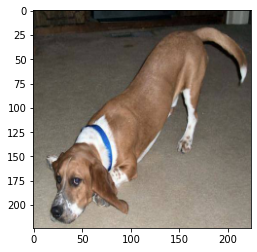

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
img_path = "./test1/10015.jpg"
img = mpimg.imread(img_path)
img = resize(img,(224,224))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = np.array(img,dtype=np.float32)
img = np.expand_dims(img,axis=0)
## Getting the model prediction on test images
prediction = model.predict(img)
y_prob = prediction.argmax(axis=-1)
print(y_prob)
# if(prediction[0][0]>prediction[0][1]):
#   print("This is a dog!")
# else:
#   print("This is a cat!")

[0]


In [ ]:
model.save_weights("./gdrive/MyDrive/cats_n_dogs")

In [ ]:
model.load_weights("./gdrive/MyDrive/cats_n_dogs")